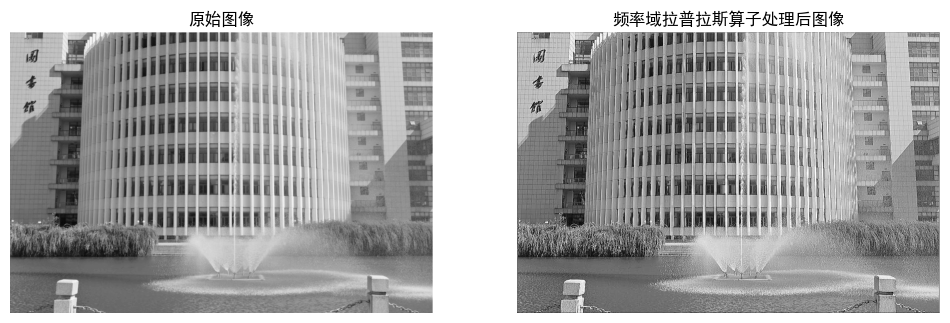

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并转换为灰度图像
im1 = cv2.imread("D:/picture/school.png")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

# 进行傅里叶变换并获取频谱，im2double类似于归一化处理，将像素值范围从[0,255]变为[0,1]
img_f = np.fft.fftshift(np.fft.fft2(im1 / 255.0))

# 获取图像的尺寸
m, n = img_f.shape
O_x = m // 2  # 圆心x坐标
O_y = n // 2  # 圆心y坐标

# 求频谱的最大值
a = np.max(np.abs(img_f))

# 定义一个空的频谱图像用于滤波
img = np.zeros((m, n), dtype=complex)

# 拉普拉斯滤波
for j in range(n):
    for i in range(m):
        d = np.sqrt((i - O_x) ** 2 + (j - O_y) ** 2)  # 计算两点之间的距离
        H = -4 * np.pi ** 2 * d ** 2 / a  # 拉普拉斯滤波器
        img[i, j] = (1 - H) * img_f[i, j]  # 应用滤波器

# 逆傅里叶变换并获取实部
img = np.fft.ifftshift(img)
img = np.real(np.fft.ifft2(img))

# 将处理后的图像恢复为uint8类型并显示
img = np.uint8(np.clip(img * 255, 0, 255))

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(im1, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.title('频率域拉普拉斯算子处理后图像'),
plt.axis('off')
plt.show()
